In [4]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

# Imports 
from pathlib import Path


CONTENT_DIR = Path.home() / 'Datasets' / 'unpackAI' / 'DL201-4.0' # Change this for use in colab
DATA_DIR = Path.cwd() /'..'/'data'

# Continious Variables (preprocessing and transformation )

In [5]:
# Image file here

## Introduction 

Goals and Objectives

Intro Paragraph

Simply put, a continous variable is one that can take any value between it's minumum and maximum value. 

Some examples of these include: Age, height and weight for people.

Measurements of units can be this as well, such as kilometers, degrees celcius, liters, or kilograms.

Continous Variables are relatively straightforward to understand, and there are many tools to handle them.

However, since there are so many tools to use, it can become a problem for beginners to be able to know which ones to apply. 

In [6]:
#picture here

A key idea in statistics is called a normal distribution.

The normal distribution is the most important distribution in statistics. Most people recognize its familiar bell-shaped curve in statistical reports.

https://statisticsbyjim.com/basics/normal-distribution/

In [7]:
#picture of a normal distribution

The normal distribution has a lot of predicting power to it, so many machine learning algorithms are based off assuming that the distrib

Normal Distributions have the following properties:

* They are supposed to be symmetric

* The mean, median, and mode are equal

* Half of the population is less than, and half the population is more than the mean. 

* The Empirical Rule allows us apply the concept of standard deviation to know where different percentages of items are within the distribution. 

In [8]:
# picture of Z scores

What is useful about this normal distribution is that it allows us to calculate probability of a sample occuring within a certain range. If our data has a normal distribution, then the machine learning algorithms have a solid foundation to build on. 

However, data is not always in a normal distribution, and sometimes needs to be transformed.

## Continous Variables across Deep Learning


Intro Paragraph

Outline

### Identifying Continous Variables in a Tabular Datasets



In [9]:
house_prices_df = pd.read_csv(DATA_DIR/'house-prices'/'train.csv')

In [10]:
house_prices_df.shape

(1460, 81)

In [11]:
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
house_prices_df.drop(['MiscVal'],axis=1,inplace=True)

In [19]:
# Splitting into categorical and continious variables 


def cont_cat_split(df, max_card=20, dep_var=None):
    "Helper function that returns column names of cont and cat variables from given `df`."
    cont_names, cat_names = [], []
    for label in df:
        #if label in L(dep_var): continue
        if ((pd.api.types.is_integer_dtype(df[label].dtype) and
            df[label].unique().shape[0] > max_card) or
            pd.api.types.is_float_dtype(df[label].dtype)):
            cont_names.append(label)
        else: cat_names.append(label)
    return cont_names, cat_names


In [20]:
cont_vars, cat_vars = cont_cat_split(house_prices_df)

In [21]:
print(cont_vars)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [22]:
print(cat_vars)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


Lets take a look at these values and see what the variables look like. In this dataset there are a lot of different variables to be considered. If you would like to swap them, you can use the following helper function.

In [289]:
def change_feature_type(swapFeature,cat_vars,cont_vars):
    cat_df = pd.DataFrame(cat_vars)
    cont_df = pd.DataFrame(cont_vars)

    cat_result = cat_df[cat_df[0]==swapFeature]
    cont_result = cont_df[cont_df[0]==swapFeature]

    if len(cat_result) > 0:
        print(f'Found: {swapFeature} in catagorical varaibles, swapping to continous variable')
        cont_vars.append(swapFeature)
        cat_vars.remove(swapFeature)

    elif len(cont_result) > 0:
        print(f'Found: {swapFeature} in continuous variables, swapping to catagorical variable')
        cat_vars.append(swapFeature)
        cont_vars.remove(swapFeature)

    else:
        print(f"Feature: {swapFeature} was not found in either list, please check spelling")  
    return (cat_vars,cont_vars)

In [23]:
#swapThisFeature = ' funding_total_usd'

#cat_vars, cont_vars = change_feature_type(swapThisFeature,cat_vars,cont_vars)


### Finding the target variable

The next important step is finding the target variable. In this dataset the target variable is the sales price of the home. 

or the column "SalePrice"

In [24]:
target = house_prices_df['SalePrice']

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

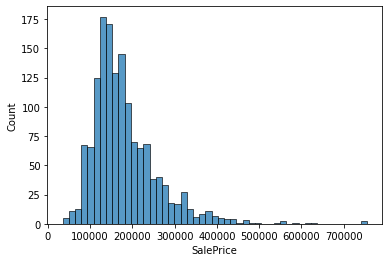

In [25]:
sns.histplot(target)

This looks like a very nice graph, but it has a real problem. There is a strong skew to the left with an appreciable tail. As you can see below, the skew value is quite large

In [26]:
target.skew()

1.8828757597682129

Luckily, this can be handled with a simple log transform

### Log Transforms 

Log transforms help to normalize data significantly. This is useful in positive skew distributions

In [27]:
house_prices_df['SalePrice'] = np.log(house_prices_df['SalePrice'])


In [28]:
target = house_prices_df['SalePrice']

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

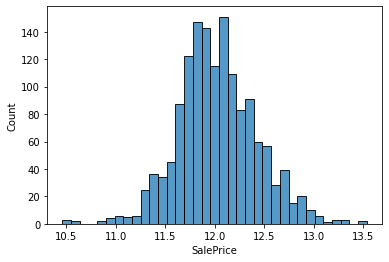

In [29]:
sns.histplot(target)

As you can see, this graph is much more normal. It has a skew much closer to zero, which means that we can now base some predictions off of this 

In [30]:
target.skew()

0.12133506220520393

In [31]:
house_prices_df[cont_vars].describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,...,346.992466,5.844521,1515.463699,1978.506164,472.980137,94.244521,46.660274,21.954110,15.060959,12.024051
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,...,436.528436,48.623081,525.480383,24.689725,213.804841,125.338794,66.256028,61.119149,55.757415,0.399452
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460242
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,1129.500000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,11.775097
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,12.001505
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,728.000000,0.000000,1776.750000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,12.273731
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,2065.000000,572.000000,5642.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,13.534473


In [32]:
cont_df = house_prices_df[cont_vars]

In [33]:
skewedFeatures = house_prices_df[cont_vars].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skewedFeatures})
skewness = skewness[skewness['Skew'].abs() > 1 ]

In [34]:
skewness

,Skew
LotArea,12.207688
LowQualFinSF,9.011341
BsmtFinSF2,4.255261
ScreenPorch,4.122214
EnclosedPorch,3.089872
MasVnrArea,2.669084
OpenPorchSF,2.364342
LotFrontage,2.163569
BsmtFinSF1,1.685503
WoodDeckSF,1.541376


Which other columns should undergo a log transform in order to normalize them?

### Normalization

#### Min Max Scaling 

One problem that could result from having a large range of data is that the large numbers and variance can cause the model to see it as more important than variables that have a smaller variance. 

Normalization can put the values into a range that falls between zero and one

This is a way of scaling takes a value, sutracts it from the smallest value in the column, then divides it by the difference between the largest and smallest columns.

$$ \tilde{x}_i = \frac{x_i - x_{min}}{x_{max} - x_{min}}. $$

This is useful in situations which are not sensitive to outliars. Since, if there is a huge max or tiny minimum value is going to drastically affect the formula. 

A year column would benefit from this kind of transformation. Since we are in the 21st century, everything in this column is going to have a huge offset of 2000

In [35]:
house_prices_df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [36]:
house_prices_df['YearRemodAdd'].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [37]:
house_prices_df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

As we can see, all of these variables about years are ripe for min, max scaling. 

In [38]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

df = house_prices_df

column_names_to_normalize = ['YearBuilt','YearRemodAdd','GarageYrBlt']
x = df[column_names_to_normalize].values


x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp

house_prices_df = df

In [39]:
house_prices_df['YearBuilt'].describe()

count    1460.000000
mean        0.719332
std         0.218862
min         0.000000
25%         0.594203
50%         0.731884
75%         0.927536
max         1.000000
Name: YearBuilt, dtype: float64

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

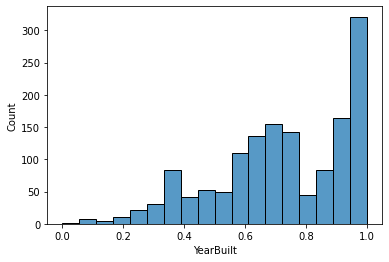

In [40]:
sns.histplot(house_prices_df['YearBuilt'])

Why is the skew unaffected by this transform? What information does this transform preserve?

In [41]:
house_prices_df['YearBuilt'].skew()

-0.6134611724881864

### BoxCox Transforms

In [42]:
# calculating  Skew and sorting 
skewedFeatures = house_prices_df[cont_vars].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skewedFeatures})
skewness = skewness[skewness['Skew'].abs() > 1 ]

In [44]:
#stats
from scipy import stats

for col in skewness.index:
    print(col)
    orginal_skew = house_prices_df[col].skew()
    
    transformed_col = stats.boxcox(np.clip(house_prices_df[col],0.0001,None))[0]
    
    tsfm_skew = pd.Series(transformed_col).skew()
    
    if tsfm_skew < orginal_skew:
        house_prices_df[col] = transformed_col
    else:
        pass
    
    
   # house_prices_df[col] =
    
#target
#house_prices_df['SalePrice'] = np.log(house_prices_df['SalePrice'])


LotArea
LowQualFinSF
BsmtFinSF2
ScreenPorch
EnclosedPorch
MasVnrArea
OpenPorchSF
LotFrontage
BsmtFinSF1
WoodDeckSF
TotalBsmtSF
1stFlrSF
GrLivArea


In [45]:
skewedFeatures = house_prices_df[cont_vars].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skewedFeatures})
skewness = skewness[skewness['Skew'].abs() > 1 ]

In [46]:
skewness

,Skew
LowQualFinSF,7.299413
ScreenPorch,3.113266
MasVnrArea,2.669084
BsmtFinSF2,2.425646
LotFrontage,2.163569
EnclosedPorch,2.047922


In [ ]:
from scipy.stats import boxcox

skewed_features = ['Pool']

for i in ske

## Standardization

Intro Paragraph
Intro Paragraph

Problems with large scales of numbers
Not easy to see a pattern if there are a huge range of possible values. The following provides a more useful way to look at some of these values. If they are standardized, we are no longer looking at the raw value. But instead at how distant it is from the mean. 

If it is lower than the mean, it will have a negative value, and if it is closer to the mean, it will have a more positive value. This can be useful when dealing with features that have large numbers.

For example, pool size as a feature is obviously very skewed, because houses that have pools are likely to cost more, and houses that have huge pools are likely to cost millions of dollars. In this sense, it might be useful to look at the problem, not based on how large the pool is, but rather, how far it is from the mean. If a house has a pool that is 2 standard deviations from the mean, it likely correlates with other values.

https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html

In [52]:
from sklearn.preprocessing import StandardScaler
standard_scalar = StandardScaler()

df = house_prices_df

column_names_to_normalize = skewness.index


x = df[column_names_to_normalize].values


x_scaled = standard_scalar.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp

house_prices_df = df

In [53]:
skewedFeatures = house_prices_df[cont_vars].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skewedFeatures})
skewness = skewness[skewness['Skew'].abs() > 1 ]
skewness

,Skew
LowQualFinSF,7.299413
ScreenPorch,3.113266
MasVnrArea,2.669084
BsmtFinSF2,2.425646
LotFrontage,2.163569
EnclosedPorch,2.047922


#### Log Scaling

Visual Data Before

In [4]:
#apply scaling


Visualize Data After 

In [5]:
# Plot Here

### Standardization

Some other data what we have can be standardized as well in order to get it

In [49]:
skewedFeatures = house_prices_df[cont_vars].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skewedFeatures})
skewness = skewness[skewness['Skew'].abs() > 1 ]

# Trasforming Image Data

Intro Paragraph

### Normalization 

Intro Paragraph

Visualize Img Array before normalization

In [12]:
#Apply Normalization

### Transforms 

Intro Paragraph

Visualize image beforehand
